In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import os, glob
from collections import Counter
%matplotlib inline

In [2]:
cd ~/dev/projetMemoire/

/Users/Theo/dev/projetMemoire


In [3]:
db = pd.read_csv("mortsduRif.tsv", sep= "\t", engine='python')
db=db.drop('Unnamed: 0',axis=1)

In [4]:
pd.options.display.max_rows = 10
pd.options.display.max_columns = 20

In [5]:
db

,id_conflit_intitule,id_sous_conflit_intitule,id_famille_cote_intitule,sous_serie,serie,article,nom,prenom,nom_autre,naissance_jour_mois_annee,...,id_transcription_etablissement_departement_intitule,id_transcription_etablissement_pays_intitule,sources,deportation,decoration_posthume,rehabilitation,lien_ark_fiche,corps_retrouve,disparition_jour_mois_annee,jdd_jour_mois_annee
0,Théâtres d'opérations extérieurs,Afrique du Nord,NaN,NaN,NaN,NaN,AB EL OUAHAB BEN SAID BEN BELGACEM,NaN,NaN,0000-00-00,...,NaN,NaN,"Service historique de la Défense, Caen",0,0,0,https://www.memoiredeshommes.sga.defense.gouv....,0,NaN,NaN
1,Théâtres d'opérations extérieurs,Afrique du Nord,AC,40.0,R,4034.0,ABABSIA OTHMANE BEN AHMED,NaN,NaN,NaN,...,NaN,Algérie,"Service historique de la Défense, Caen",0,0,0,https://www.memoiredeshommes.sga.defense.gouv....,0,NaN,NaN
2,Théâtres d'opérations extérieurs,Afrique du Nord,AC,40.0,R,4034.0,ABAD,Tayeb,NaN,NaN,...,NaN,NaN,"Service historique de la Défense, Caen",0,0,0,https://www.memoiredeshommes.sga.defense.gouv....,0,NaN,NaN
3,Théâtres d'opérations extérieurs,Afrique du Nord,AC,40.0,R,4034.0,ABADIE,Jean Aubin,NaN,0000-00-00,...,65 - Hautes-Pyrénées,NaN,"Service historique de la Défense, Caen",0,0,0,https://www.memoiredeshommes.sga.defense.gouv....,0,NaN,NaN
4,Théâtres d'opérations extérieurs,Afrique du Nord,AC,40.0,R,4034.0,ABBADIE,Jules Jean Marie,NaN,NaN,...,64 - Pyrénées-Atlantiques (ex Basses-Pyrénées),NaN,"Service historique de la Défense, Caen",0,0,0,https://www.memoiredeshommes.sga.defense.gouv....,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4717,Théâtres d'opérations extérieurs,Afrique du Nord,AC,40.0,R,4046.0,LOUZABI,Ahmed,NaN,NaN,...,NaN,Algérie,"Service historique de la Défense, Caen",0,0,0,https://www.memoiredeshommes.sga.defense.gouv....,0,NaN,NaN
4718,Théâtres d'opérations extérieurs,Afrique du Nord,AC,40.0,R,4046.0,LUCAS,Marcel Charles,NaN,NaN,...,92 - Hauts-de-Seine (ex Seine et Seine-et-Oise),NaN,"Service historique de la Défense, Caen",0,0,0,https://www.memoiredeshommes.sga.defense.gouv....,0,NaN,NaN
4719,Théâtres d'opérations extérieurs,Afrique du Nord,AC,40.0,R,4046.0,LUDWIG,Otto,NaN,NaN,...,75 - Paris (ex Seine),NaN,"Service historique de la Défense, Caen",0,0,0,https://www.memoiredeshommes.sga.defense.gouv....,0,NaN,NaN
4720,Théâtres d'opérations extérieurs,Afrique du Nord,AC,40.0,R,4046.0,LUIGEMANN,Clément,NaN,NaN,...,75 - Paris (ex Seine),NaN,"Service historique de la Défense, Caen",0,0,0,https://www.memoiredeshommes.sga.defense.gouv....,0,NaN,NaN


In [6]:
db.columns

Index(['id_conflit_intitule', 'id_sous_conflit_intitule',
       'id_famille_cote_intitule', 'sous_serie', 'serie', 'article', 'nom',
       'prenom', 'nom_autre', 'naissance_jour_mois_annee',
       'id_naissance_lieu_intitule', 'id_naissance_departement_intitule',
       'id_naissance_pays_intitule', 'id_statut_intitule',
       'id_mention_intitule', 'classe', 'recrutement_matricule',
       'id_recrutement_bureau_intitule', 'id_grade_intitule',
       'id_unite_intitule', 'id_bataillon_intitule', 'detail_unite',
       'id_profession_intitule', 'deces_jour_mois_annee',
       'id_deces_lieu_intitule', 'id_deces_departement_intitule',
       'id_deces_pays_intitule', 'id_operation_intitule',
       'id_transcription_etablissement_lieu_intitule',
       'id_transcription_etablissement_departement_intitule',
       'id_transcription_etablissement_pays_intitule', 'sources',
       'deportation', 'decoration_posthume', 'rehabilitation',
       'lien_ark_fiche', 'corps_retrouve', 'dispar

In [7]:
db['id_deces_lieu_intitule'].value_counts()

Taza                    306
non connu               263
Fès (Maroc)             250
Meknès                  152
Ouezzane                129
                       ... 
Bab Maddoub (Djebel)      1
Techta ben Abhou          1
Djebel du Malem           1
Achaïk                    1
Tizi n'Tighemine          1
Name: id_deces_lieu_intitule, Length: 507, dtype: int64

In [8]:
placeList = dict(Counter(db['id_deces_lieu_intitule']))
regiments=list(placeList.keys())
places=list(placeList.values())

In [9]:
placeList

{'Taza': 306,
 'Tifi Lhassen': 68,
 'Meknès': 152,
 'Bou Harou': 14,
 'Djebel Ayad': 22,
 "M'Sila (ex département de Constantine)": 73,
 'Astar': 51,
 'Tafrant': 46,
 'Siraoua': 8,
 'Taounzet': 20,
 'Djebel Noulay': 1,
 'Sidi Abdallah': 20,
 "M'Zara": 90,
 'Taleghza': 37,
 'Zrarfret': 3,
 'Aïn Médiouna': 53,
 'Bab Hocéïne': 6,
 'Bab Taza': 72,
 'Tilmirat': 19,
 'Téroual': 84,
 'Béchyne': 3,
 "M'Zefroun": 5,
 'Ahel es Zaouïa': 61,
 'non connu': 263,
 'Djebel Rak Baba': 18,
 'Marrakech': 21,
 "Tizi N'Ouidel": 93,
 'Bou Denib': 9,
 'Ouled Ali ben Aïssa': 2,
 'Issoual': 45,
 'Djebel en Néhir': 46,
 'Bab el Haoud': 4,
 'Bou Bibane': 67,
 'Mezraoua': 14,
 'Bab Moroudj': 63,
 "Boured - circonscription d'Aknoul": 5,
 'Aïn Aïcha': 69,
 'Aïn Leuh': 7,
 'Djebel Alfa': 25,
 'Sidi Boubker': 1,
 'Oued Amzez': 24,
 'Oued Hamrine': 13,
 'Trick Soltane': 20,
 'Fès el Bali': 20,
 'Immouzer': 5,
 'Beni Routen': 4,
 'Fès (Maroc)': 250,
 'Doukkène': 3,
 'Coff el Kélaa': 7,
 'Zitouna': 9,
 'Ametsef': 5,
 'M

In [10]:
mortsparLieu=pd.DataFrame.from_dict(placeList, orient='index')
mortsparLieu.columns= [" "]
mortsparLieu=mortsparLieu.sort_values(by=[" "],ascending=False)

In [11]:
mortsparLieu

,
Taza,306
non connu,263
Fès (Maroc),250
Meknès,152
Ouezzane,129
...,...
Bab Maddoub (Djebel),1
Techta ben Abhou,1
Djebel du Malem,1
Achaïk,1


In [12]:
mortsparLieu=mortsparLieu.swapaxes('index','columns')

In [13]:
mortsparLieu

,Taza,non connu,Fès (Maroc),Meknès,Ouezzane,Casablanca,Taounate,Tizi N'Ouidel,M'Zara,Bibane,...,Djebel Hadar,Anoubal,Amssil,Kerrouchen,Armama,Bab Maddoub (Djebel),Techta ben Abhou,Djebel du Malem,Achaïk,Tizi n'Tighemine
,306,263,250,152,129,99,98,93,90,85,...,1,1,1,1,1,1,1,1,1,1


In [14]:
top20 = mortsparLieu.columns[0:20]
next20 = mortsparLieu.columns[21:41]
last20 = mortsparLieu.columns[42:62]

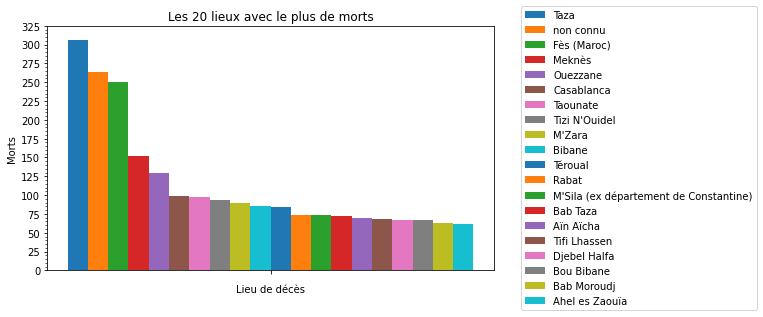

In [18]:
fig = mortsparLieu[top20].plot(kind='bar', width = 5)
plt.legend(bbox_to_anchor=(1.6, 1.1), loc='upper right')
fig.set_ylabel('Morts')
fig.set_xlabel('Lieu de décès')
fig.set_title('Les 20 lieux avec le plus de morts')
fig.yaxis.set_major_locator(ticker.MultipleLocator(25))
fig.yaxis.set_minor_locator(ticker.MultipleLocator(5))
fig.set_ylim(bottom=0, top=325)
plt.rcParams["figure.figsize"] = [8.00, 4.50]

plt.savefig('20places.jpg', dpi = 300, bbox_inches='tight', pad_inches=0.5, 
            facecolor='auto', edgecolor='white', orientation = 'landscape')

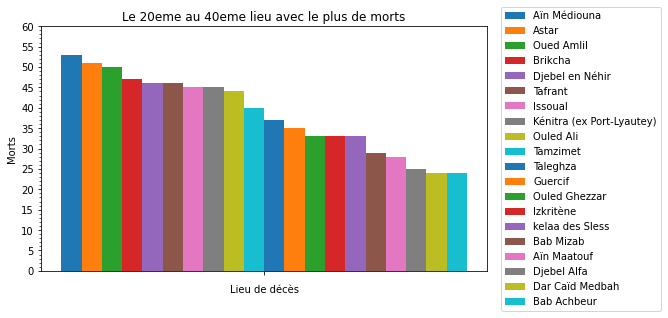

In [16]:
fig2 = mortsparLieu[next20].plot(kind='bar', width = 5)
plt.legend(bbox_to_anchor=(1.4, 1.1), loc='upper right')
fig2.set_ylabel('Morts')
fig2.set_xlabel('Lieu de décès')
fig2.set_title('Le 20eme au 40eme lieu avec le plus de morts')
fig2.yaxis.set_major_locator(ticker.MultipleLocator(5))
fig2.yaxis.set_minor_locator(ticker.MultipleLocator(1))
fig2.set_ylim(bottom=0, top=60)
plt.rcParams["figure.figsize"] = [8.00, 4.50]

plt.savefig('next20places.jpg', dpi = 300, bbox_inches='tight', pad_inches=0.5, 
            facecolor='auto', edgecolor='white', orientation = 'landscape')

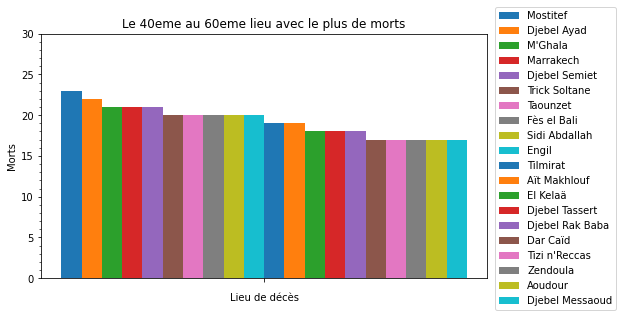

In [17]:
fig3 = mortsparLieu[last20].plot(kind='bar', width = 5)
plt.legend(bbox_to_anchor=(1.3, 1.13), loc='upper right')
fig3.set_ylabel('Morts')
fig3.set_xlabel('Lieu de décès')
fig3.set_title('Le 40eme au 60eme lieu avec le plus de morts')
fig3.yaxis.set_major_locator(ticker.MultipleLocator(5))
fig3.yaxis.set_minor_locator(ticker.MultipleLocator(1))
fig3.set_ylim(bottom=0, top=30)
plt.rcParams["figure.figsize"] = [8.00, 4.50]

plt.savefig('last20places.jpg', dpi = 300, bbox_inches='tight', pad_inches=0.5, 
            facecolor='auto', edgecolor='white', orientation = 'landscape')